**Install YOLOv8 (Ultralytics) and import**

In [1]:
!pip install ultralytics --quiet

from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
with open("/content/drive/MyDrive/through yolo object counting/data.yaml", "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

roboflow:
  workspace: roboflow-gw7yv
  project: vehicles-openimages
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-gw7yv/vehicles-openimages/dataset/1


In [7]:
DATA_YAML = "/content/drive/MyDrive/through yolo object counting/data.yaml"

**Choose YOLOv8 model and configure training**

In [8]:
# Load pretrained YOLOv8 small model (on COCO)
model = YOLO("yolov8s.pt")


In [9]:
EPOCHS = 10
RUN_NAME = "cars_yolov8s_custom"

results = model.train(
    data=DATA_YAML,      # path to data.yaml
    epochs=EPOCHS,
    imgsz=640,
    batch=16,
    name=RUN_NAME,
    project="runs/detect",  # default project for detect
    patience=10,            # stop early if no improvement
    lr0=0.01,               # initial learning rate
    optimizer="SGD",        # can change to 'AdamW'
    pretrained=True,        # transfer learning from COCO
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/through yolo object counting/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cars_yolov8s_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, pat

In [10]:
best_model_path = f"runs/detect/{RUN_NAME}/weights/best.pt"
best_model = YOLO(best_model_path)

metrics = best_model.val(data=DATA_YAML, imgsz=640)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 21.3±3.2 MB/s, size: 27.2 KB)
val: Scanning /content/drive/MyDrive/through yolo object counting/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 250/250 393.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 3.1it/s 5.1s
                   all        250        454      0.706       0.58      0.629      0.471
             Ambulance         50         64      0.756      0.781      0.816      0.704
                   Bus         30         46      0.831      0.652      0.707      0.558
                   Car         90        238      0.663      0.429      0.524      0.377
            Motorcycle         42         46      0.698      0.739      0.681      0.414
               

In [11]:
print("mAP@0.5:", metrics.box.map50)        # this is your main 'accuracy' target
print("mAP@0.5:0.95:", metrics.box.map)     # harder metric
print("Precision:", metrics.box.mp)         # mean precision
print("Recall:", metrics.box.mr)            # mean recall


mAP@0.5: 0.6288145384656165
mAP@0.5:0.95: 0.47057530492500804
Precision: 0.7058605413915238
Recall: 0.5803827839346656


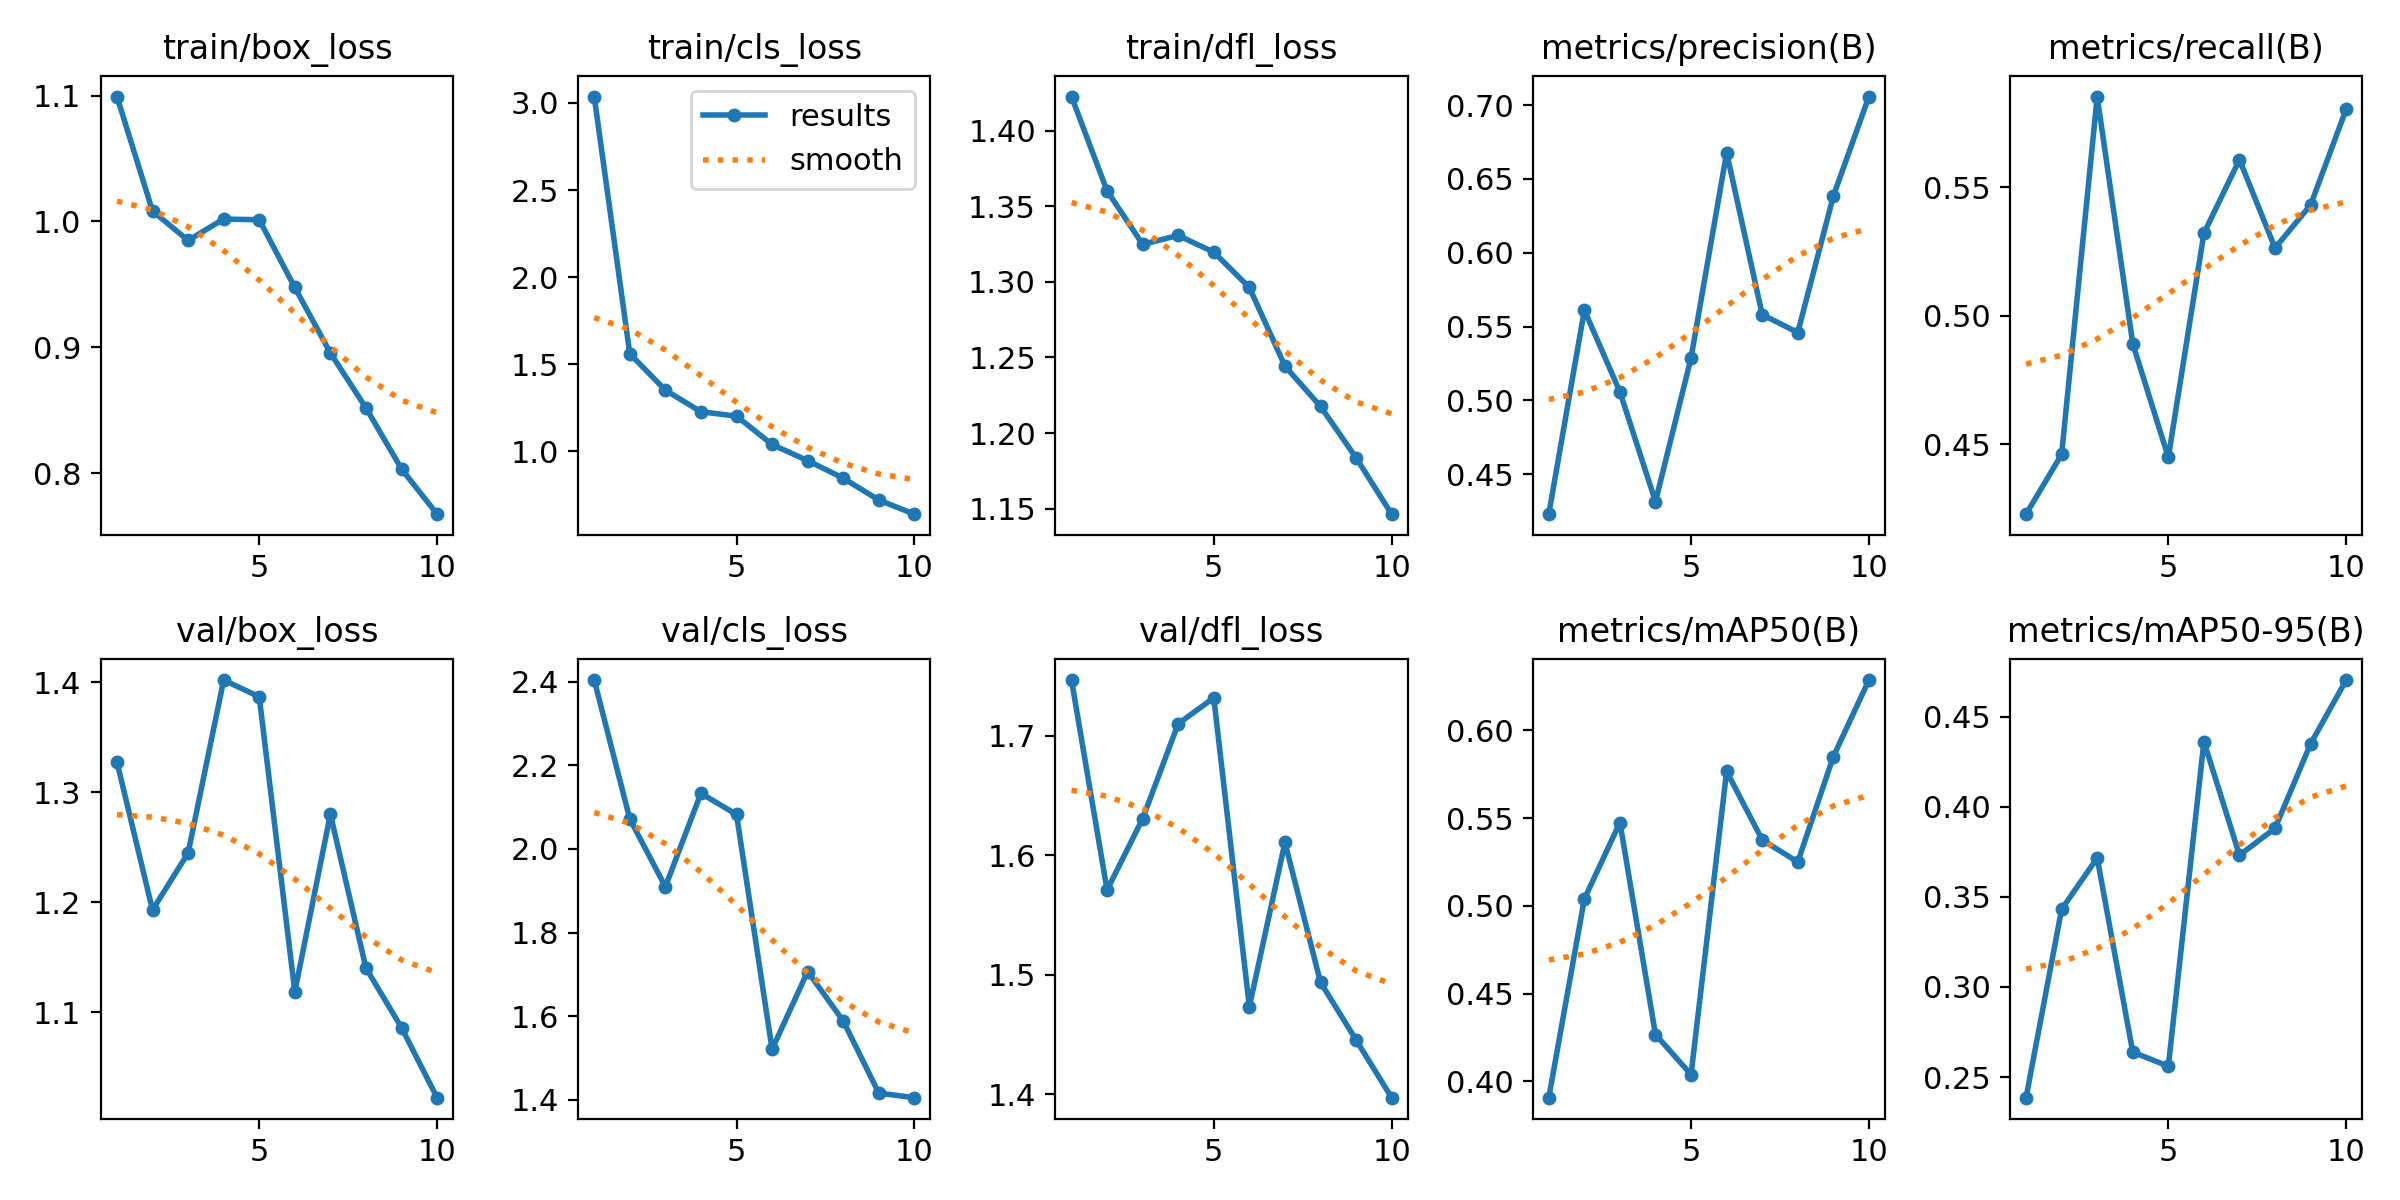

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f"runs/detect/{RUN_NAME}/results.png")


In [15]:
TEST_DIR = "/content/drive/MyDrive/through yolo object counting/test/images"

os.makedirs(TEST_DIR, exist_ok=True)

# List images
supported_ext = (".jpg", ".jpeg", ".png")
test_image_paths = [
    os.path.join(TEST_DIR, f)
    for f in os.listdir(TEST_DIR)
    if f.lower().endswith(supported_ext)
]

print(f"Found {len(test_image_paths)} test images")
test_image_paths[:5]


Found 126 test images


['/content/drive/MyDrive/through yolo object counting/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg',
 '/content/drive/MyDrive/through yolo object counting/test/images/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg',
 '/content/drive/MyDrive/through yolo object counting/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg',
 '/content/drive/MyDrive/through yolo object counting/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg',
 '/content/drive/MyDrive/through yolo object counting/test/images/6e85d4ef31b5eed3_jpg.rf.01ea5ec813abb42ce956650ad5ea6a35.jpg']

In [16]:
CAR_CLASS_ID = 0
print(best_model.names)  # should be {0: 'car'}


{0: 'Ambulance', 1: 'Bus', 2: 'Car', 3: 'Motorcycle', 4: 'Truck'}


In [17]:
def detect_and_count_cars(image_path, model, car_class_id=0, conf_threshold=0.25):
    # Run YOLOv8 inference
    results = model(image_path, conf=conf_threshold, verbose=False)[0]

    # Read image with OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    car_count = 0

    for box in results.boxes:
        cls_id = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        x1, y1, x2, y2 = box.xyxy[0].tolist()

        if cls_id == car_class_id:
            car_count += 1

            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label = f"car {conf:.2f}"
            cv2.putText(
                img,
                label,
                (x1, max(y1 - 5, 0)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 255, 0),
                2
            )

    return car_count, img


Testing on: /content/drive/MyDrive/through yolo object counting/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg
Detected cars: 1


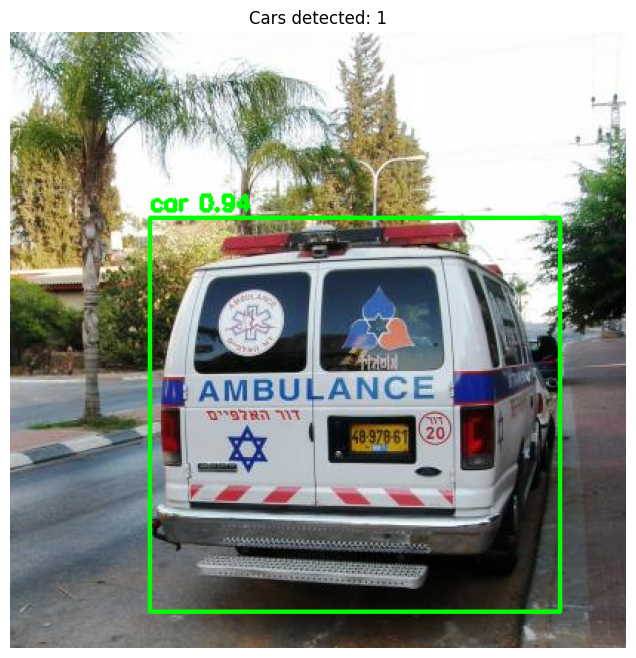

In [18]:
test_image = test_image_paths[0]
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, best_model)
print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()


Testing on: /content/drive/MyDrive/through yolo object counting/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg
Detected cars: 0


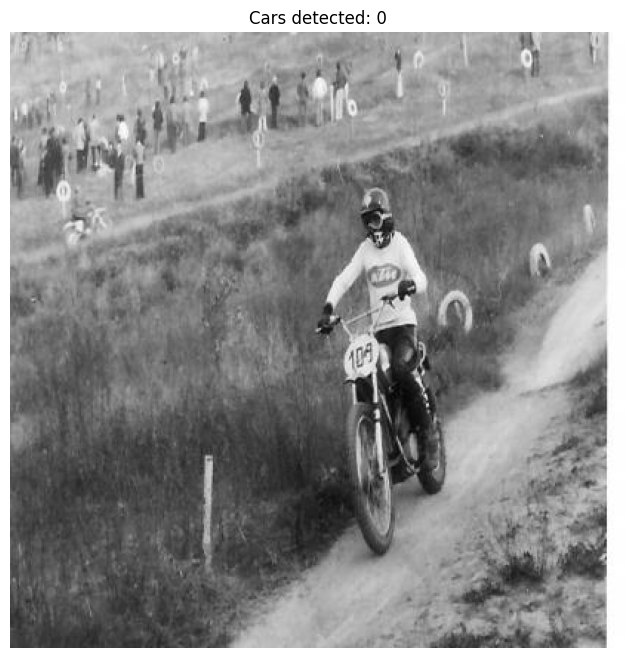

In [24]:
test_image = test_image_paths[3]
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, best_model)
print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()

In [19]:
OUTPUT_DIR = "output_annotated"
os.makedirs(OUTPUT_DIR, exist_ok=True)

summary = []

for img_path in test_image_paths:
    car_count, annotated_img = detect_and_count_cars(img_path, best_model)
    summary.append({"image": os.path.basename(img_path), "cars": car_count})

    out_name = os.path.join(OUTPUT_DIR, f"cars_{os.path.basename(img_path)}")
    plt.imsave(out_name, annotated_img)

summary


[{'image': '00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg', 'cars': 1},
 {'image': '10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg',
  'cars': 0},
 {'image': '00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg',
  'cars': 1},
 {'image': '10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg', 'cars': 0},
 {'image': '6e85d4ef31b5eed3_jpg.rf.01ea5ec813abb42ce956650ad5ea6a35.jpg',
  'cars': 0},
 {'image': '6dce4caa5b30c32a_jpg.rf.99b1738867fe889250ccde59b52715fb.jpg',
  'cars': 0},
 {'image': '479012386aa308fb_jpg.rf.VLWysXm9Sry0kGyATZBb.jpg', 'cars': 0},
 {'image': '31d30eccf56cac5f_jpg.rf.DPfttPJtcKnLajb1gulu.jpg', 'cars': 0},
 {'image': '59b1c028bd8b08dc_jpg.rf.7cee04415facc914c97d31374c550472.jpg',
  'cars': 0},
 {'image': '2eaf88e3156629c6_jpg.rf.73ce41f3e4820d02eecbb00c405e6e6e.jpg',
  'cars': 0},
 {'image': '621edf1632f6f63c_jpg.rf.caa3c8e665a2cccfbaf94d9c70999e94.jpg',
  'cars': 0},
 {'image': '1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg',
  

Testing on: /content/drive/MyDrive/through yolo object counting/test/images/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg
Detected cars: 0


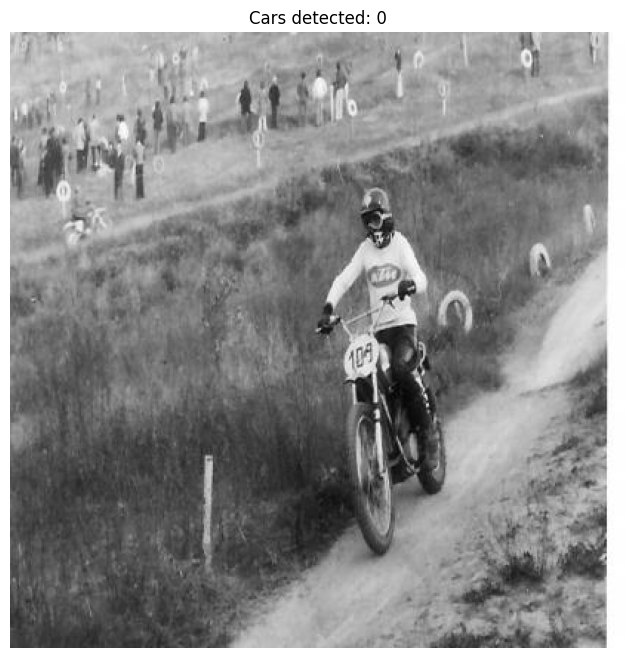

In [20]:
test_image = test_image_paths[1]
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, best_model)
print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()

Testing on: /content/drive/MyDrive/through yolo object counting/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg
Detected cars: 1


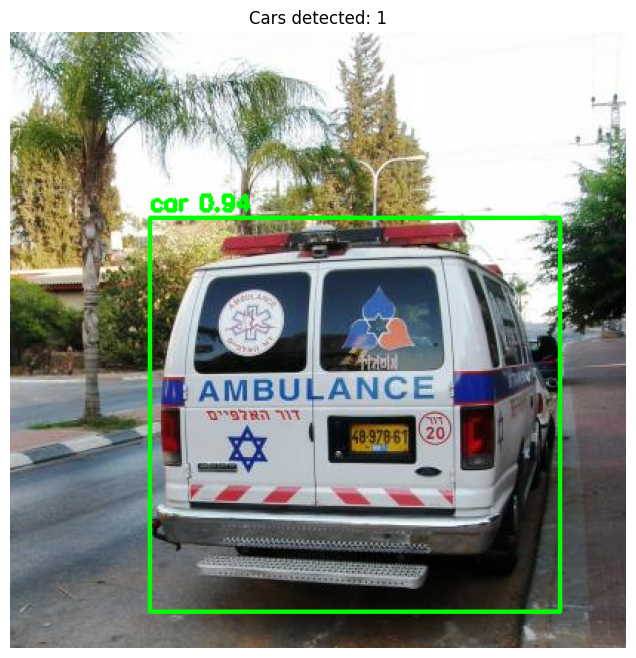

In [21]:
test_image = test_image_paths[2]
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, best_model)
print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()

Testing on: /content/drive/MyDrive/through yolo object counting/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg
Detected cars: 0


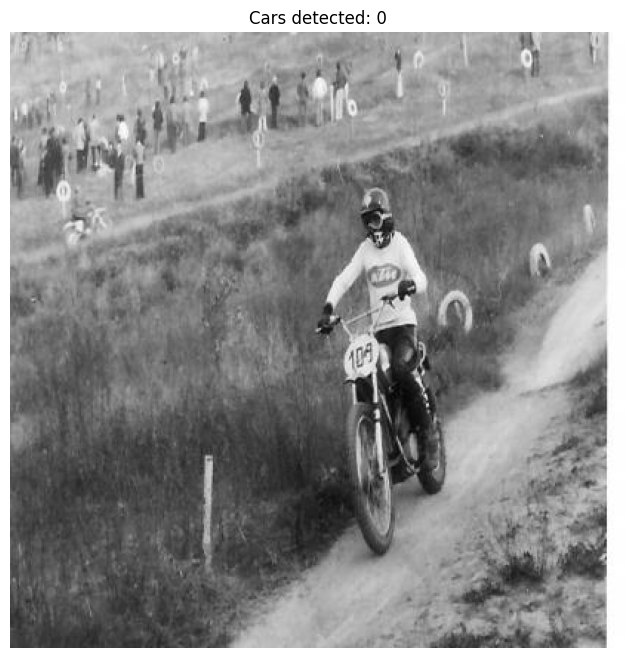

In [22]:
test_image = test_image_paths[3]
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, best_model)
print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()

Testing on: /content/drive/MyDrive/through yolo object counting/test/images/6e85d4ef31b5eed3_jpg.rf.01ea5ec813abb42ce956650ad5ea6a35.jpg
Detected cars: 0


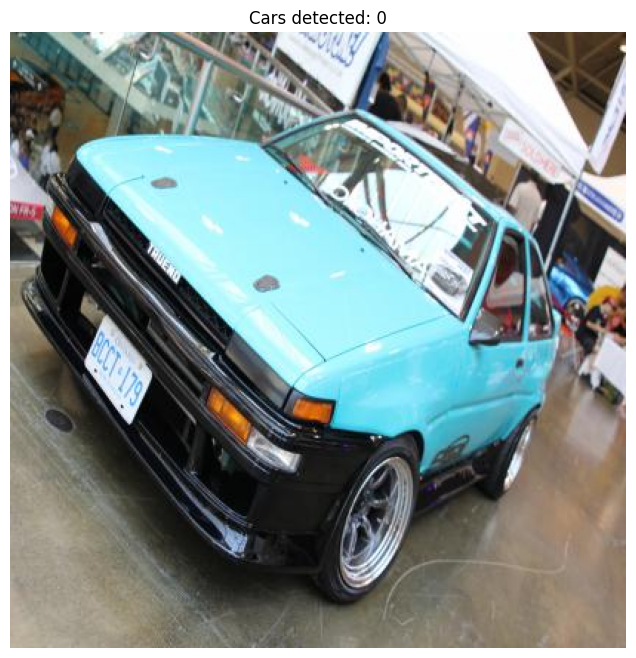

In [23]:
test_image = test_image_paths[4]
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, best_model)
print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()